<a href="https://colab.research.google.com/github/Jlokkerbol/practice_datasets/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('psych')
install.packages('tidyverse')
install.packages('corrplot')
install.packages('ggplot2')
install.packages('caret')
install.packages('Metrics')
install.packages('e1071')
install.packages('glmnet')

library(psych)          # alternative package to describe your data
library(tidyverse)      # easy way to subset your data
library(corrplot)       # to draw correlation plots
library(ggplot2)        # to plot graphs
library(caret)          # to run machine learning models
library(Metrics)        # to calculate RMSE
library(e1071)          # for statistical analyses
library(glmnet)         # for statistical analyses

options(scipen=999) # turn off scientific notation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘shape’


── Attaching packages ───────────────────

In [2]:

df = read.csv('https://raw.githubusercontent.com/jads-nl/discover-projects/main/uci-heart-disease/heart.csv')


This data set dates from 1988 and contains data on four locations: 
Cleveland, Hungary, Switzerland, and Long Beach V. It originally contained 76 attributes, but all published experiments refer to using a subset of 14 attributes. 
The "target" variable refers to the presence of heart disease in the patient (0 = no heart disease and 1 = heart disease).
Link to dataset: https://www.kaggle.com/johnsmith88/heart-disease-dataset

## Exercise 1: Familiarize yourself with the data.
Provide a table with descriptive statistics for all included variables and check:

-Classes of each of the variables (e.g. factors or continuous variables).

-Change the class of the "target" variable such that it is a binary factor

-Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies).  

-Explore missing values: sapply(df, function(x) sum(is.na(x)))  

HINT: Use the base-R function "str" (no package needed)
Use the "describe" function (from the psych"-package) for continuous variables and the "table" function (base-R) for factor variables.

In [3]:
# To check the structure of the data, you can use the "str"-command:
str(df)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


In [4]:
#To create a binary factor (as target has only two levels)
df$target <- as.factor(df$target) ## We need to tell R that our outcome is a binary factor
table(df$target)


  0   1 
138 165 

In [5]:
#Explore missing values: 
sapply(df, function(x) sum(is.na(x))) 

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0

In [6]:
# To describe numeric and integer variables
df %>%
  keep(is.numeric) %>% 
  describe

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,303,54.3663366,9.0821010,55.0,54.5432099,10.37820,29,77.0,48.0,-0.2004632,-0.56912374,0.52175307
sex,2,303,0.6831683,0.4660108,1.0,0.7283951,0.00000,0,1.0,1.0,-0.7835174,-1.39065743,0.02677162
cp,3,303,0.9669967,1.0320525,1.0,0.8641975,1.48260,0,3.0,3.0,0.4799436,-1.20511726,0.05928987
trestbps,4,303,131.6237624,17.5381428,130.0,130.4362140,14.82600,94,200.0,106.0,0.7067170,0.86839602,1.00753998
chol,5,303,246.2640264,51.8307510,240.0,243.4855967,47.44320,126,564.0,438.0,1.1321049,4.36284085,2.97759884
fbs,6,303,0.1485149,0.3561979,0.0,0.0617284,0.00000,0,1.0,1.0,1.9670254,1.87541099,0.02046303
restecg,7,303,0.5280528,0.5258596,1.0,0.5185185,0.00000,0,2.0,2.0,0.1609167,-1.37083448,0.03020984
thalach,8,303,149.6468647,22.9051611,153.0,150.9753086,22.23900,71,202.0,131.0,-0.5321005,-0.09992646,1.31586712
exang,9,303,0.3267327,0.4697945,0.0,0.2839506,0.00000,0,1.0,1.0,0.7351959,-1.46428695,0.02698899


## Exercise 2: 
The variable "target" refers to the presence of heart disease and hence is the variable of interest for our prediction model ("Y" or dependent variable). 

The frequency of the outcomes (heart disease yes/no) was already determined in the previous code blocks. Please further explore Y in terms of:

-Describe X-variables separately for both outcome categories (using describeBy(df, group = df$target)

-Draw a correlation plot to see all correlations between Y and the independent (numeric) variables (see HINT 2 below)

-Visualize the relation between Y and a few correlated X-variables (i.e. create boxplot or scatterplot using the "ggplot2"-package)


### HINT 1: For visualisation, ggplot is frequently used as it provides a flexible way to draw a lot of different graphs.
Ggplot contains two basic elements: 

1.The initiation command: ggplot(DATASET, aes(x=XVAR, y=YVAR, group=XVAR)). This draws a blank ggplot. Even though the x and y are specified, there are no points or lines in it.

2.Add the respective geom of interest (for this exercise you'll need "+geom_boxplot()")

The full code to write a boxplot would then be: ggplot(DATASET, aes(x=XVAR, y=YVAR, group=YVAR)) + geom_boxplot()

### HINT 2: 
To draw a correlation plot. Please use the "corrplot"-package. Using this package, one van construct a correlation plot in two steps:

1.Use "cor" to calculate correlation between all combinations of numeric variables (note: there are only numeric variables in the dataset)

2.Plot the calculated correlation by using the "corrplot"-function
Note that target must be transformed back into a numeric variable for this exercise

In [8]:
# Describe X-variables separately for both outcome categories:
describeBy(df, group=df$target)


 Descriptive statistics by group 
group: 0
         vars   n   mean    sd median trimmed   mad min   max range  skew
age         1 138  56.60  7.96   58.0   57.05  5.93  35  77.0  42.0 -0.54
sex         2 138   0.83  0.38    1.0    0.90  0.00   0   1.0   1.0 -1.70
cp          3 138   0.48  0.91    0.0    0.29  0.00   0   3.0   3.0  1.61
trestbps    4 138 134.40 18.73  130.0  132.84 14.83 100 200.0 100.0  0.84
chol        5 138 251.09 49.45  249.0  250.06 49.67 131 409.0 278.0  0.31
fbs         6 138   0.16  0.37    0.0    0.08  0.00   0   1.0   1.0  1.84
restecg     7 138   0.45  0.54    0.0    0.41  0.00   0   2.0   2.0  0.61
thalach     8 138 139.10 22.60  142.0  139.77 23.72  71 195.0 124.0 -0.29
exang       9 138   0.55  0.50    1.0    0.56  0.00   0   1.0   1.0 -0.20
oldpeak    10 138   1.59  1.30    1.4    1.47  1.48   0   6.2   6.2  0.73
slope      11 138   1.17  0.56    1.0    1.20  0.00   0   2.0   2.0  0.03
ca         12 138   1.17  1.04    1.0    1.08  1.48   0   4.0   4.0 

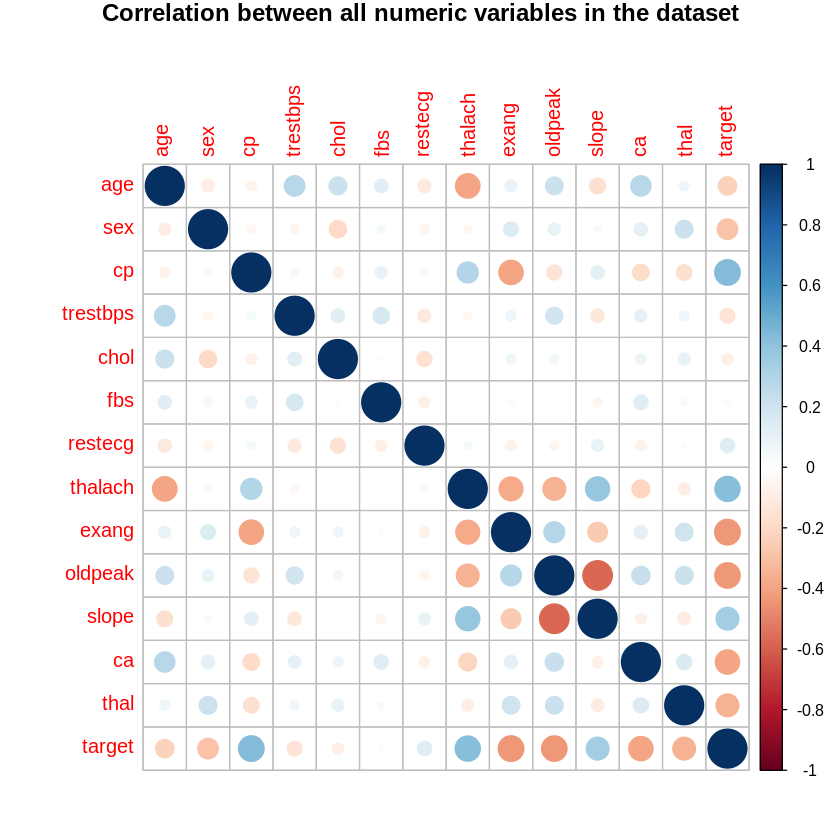

In [10]:
# Correlation plot 
df$target = as.numeric(df$target)
corr_df <- df %>% 
  keep(is.numeric) %>% 
  cor

corrplot(corr_df, number.font=12, tl.cex = 1.00, title="Correlation between all numeric variables in the dataset", mar=c(0,0,1,0))
df$target = as.factor(df$target)

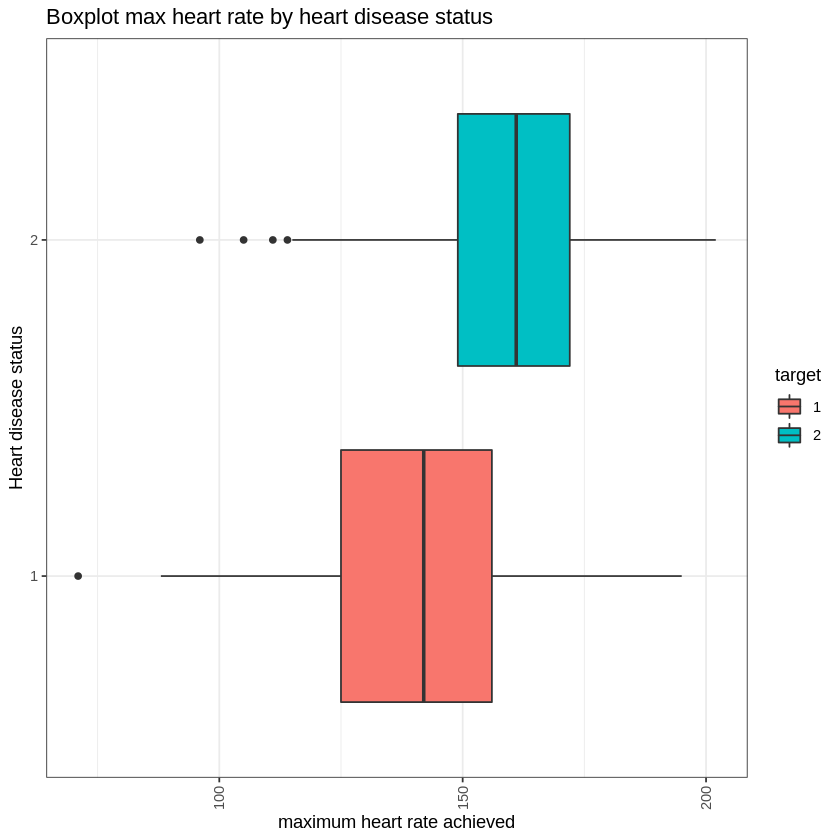

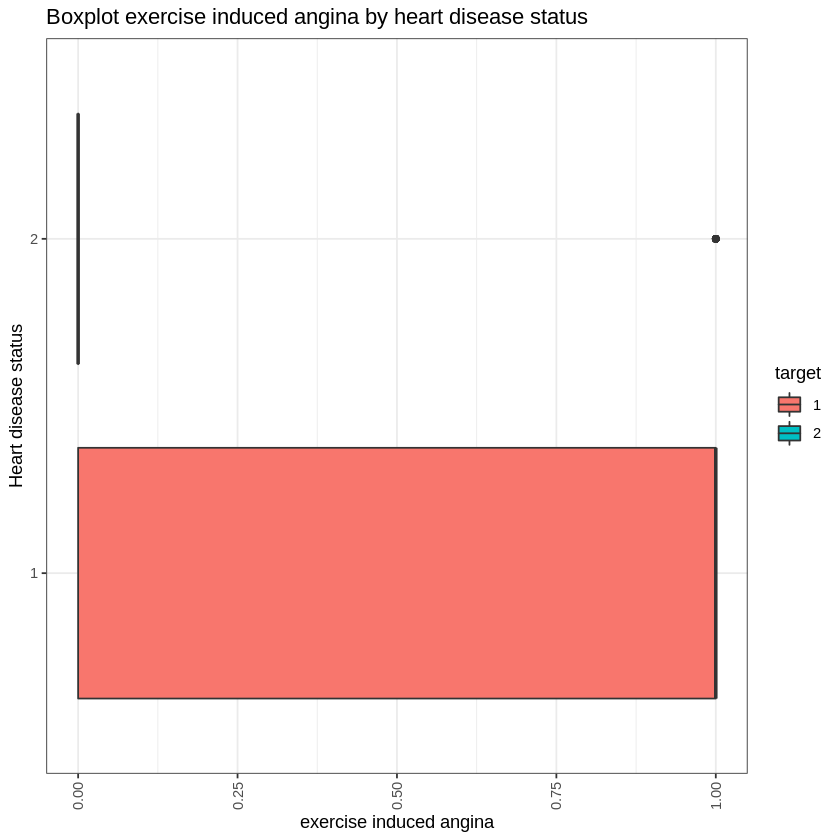

In [12]:
# Construct boxplot
ggplot(df, aes(x=thalach, y=target, group=target)) + 
  geom_boxplot(aes(fill=target)) +
  labs(title="Boxplot max heart rate by heart disease status")+
  ylab(label="Heart disease status") + 
  xlab("maximum heart rate achieved")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

ggplot(df, aes(x=exang, y=target, group=target)) + 
  geom_boxplot(aes(fill=target)) +
  labs(title="Boxplot exercise induced angina by heart disease status")+
  ylab(label="Heart disease status") + 
  xlab("exercise induced angina")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


## Exercise 3 
Now that we have a feeling of the information in the dataset and we know that there are no missing values, we can start by running some simple machine learning models.
We will use the "caret"-package for this exercise. 
For this we'll need to split the data in a train and a test set. 
Use the following code to create a train and test dataset:

In [13]:
set.seed (123456789)
dt = sort(sample(nrow(df), nrow(df)*.7)) ## 70% in train set
train<-df[dt,]
test<-df[-dt,]

Do you understand why we are splitting the data? 
Do you understand what has been done in the code above?

Next we need to specify how we want to perform the cross-validation (i.e. the optimization of the model on the train set). To this extend we need to set the method of CV, the number of folds and the numer of times we want to repeat the process.
This can be done using the following command:

In [14]:
# Cross-validation strategy
ctrl <- trainControl(method = "repeatedcv",
                     number = 5,    # ten folds
                     repeats = 3)   # repeated three times

## Exercise 3.1
Once this has been set, we are ready to run the models on the train set. 
Use the syntax below to estimate a linear model, LASSO model and a kNN model on the train set:
Please inspect the outcomes of the model. Which model performs best? 

In [16]:
## Run LM
lm <- train(target ~ ., method = "glm", 
            data = train, 
            trControl = ctrl, 
            preProcess = c("center"))
            
lm # to obtain summary of the model
varImp(lm) # to see most important parameters

Generalized Linear Model 

212 samples
 13 predictor
  2 classes: '1', '2' 

Pre-processing: centered (13) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 170, 169, 170, 170, 169, 170, ... 
Resampling results:

  Accuracy   Kappa    
  0.8376154  0.6711955


glm variable importance

         Overall
cp       100.000
ca        94.690
sex       90.995
thal      71.513
exang     51.898
oldpeak   46.067
thalach   44.277
slope     41.698
trestbps  35.946
chol      27.437
restecg   16.487
age        7.587
fbs        0.000

k-Nearest Neighbors 

212 samples
 13 predictor
  2 classes: '1', '2' 

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 170, 169, 170, 170, 169, 169, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.8147368  0.6227419
  7  0.8177250  0.6301985
  9  0.8050986  0.6037789

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

ROC curve variable importance

         Importance
cp           100.00
thalach       97.14
oldpeak       92.78
ca            89.86
exang         85.75
thal          76.81
slope         74.06
sex           60.46
age           51.59
trestbps      32.16
restecg       25.42
chol          24.28
fbs            0.00

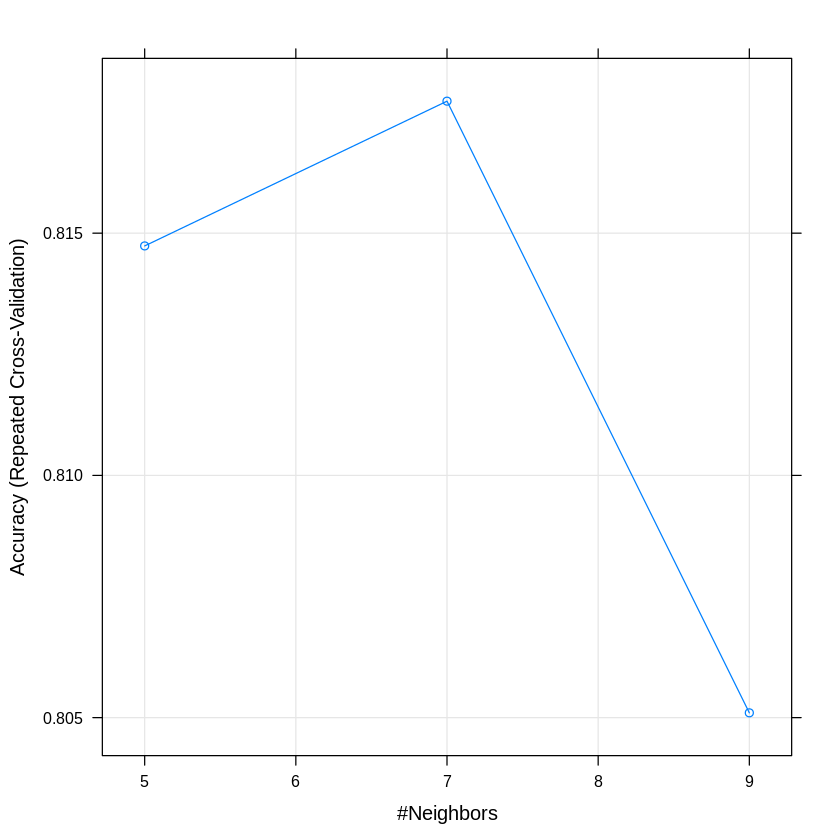

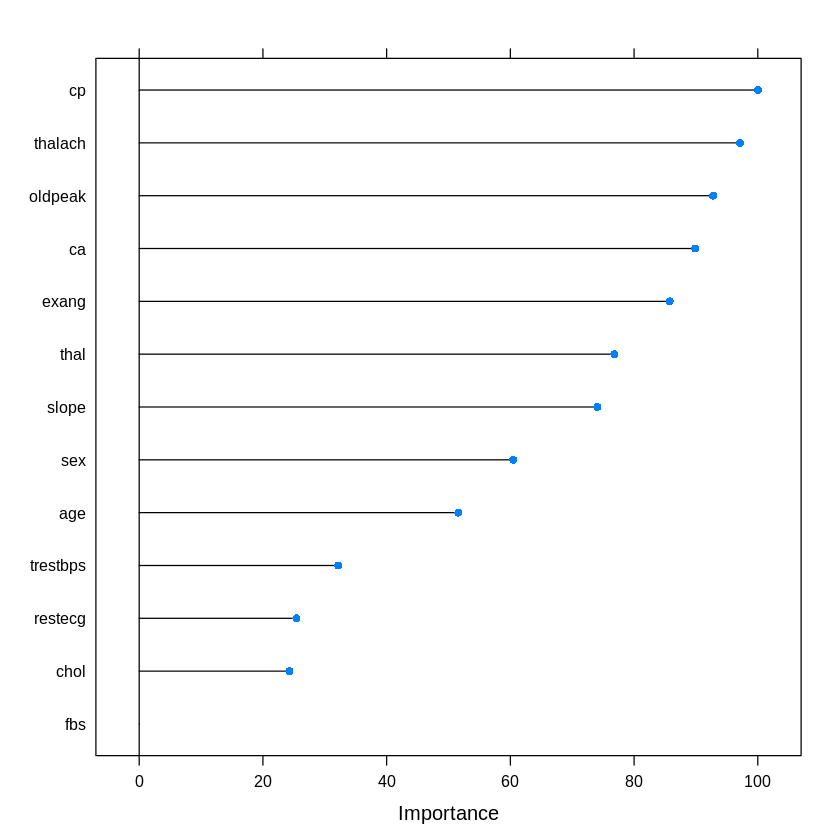

In [17]:
## Run kNN
knnFit <- train(target ~ ., 
                data = train, 
                method = "knn", 
                trControl = ctrl, 
                preProcess = c("center","scale"))

knnFit  # to obtain summary of the model
plot(knnFit)
varImp(knnFit) # to see most important parameters
plot(varImp(knnFit)) # to plot most important parameters

glmnet 

212 samples
 13 predictor
  2 classes: '1', '2' 

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 170, 169, 171, 169, 169, 169, ... 
Resampling results across tuning parameters:

  lambda          Accuracy   Kappa     
     0.001000000  0.8207907  0.63805963
     0.001149757  0.8207907  0.63805963
     0.001321941  0.8207907  0.63805963
     0.001519911  0.8207907  0.63805963
     0.001747528  0.8207907  0.63805963
     0.002009233  0.8207907  0.63805963
     0.002310130  0.8207907  0.63805963
     0.002656088  0.8207907  0.63805963
     0.003053856  0.8207907  0.63805963
     0.003511192  0.8208276  0.63807728
     0.004037017  0.8224536  0.64128836
     0.004641589  0.8209032  0.63810153
     0.005336699  0.8193528  0.63487163
     0.006135907  0.8193528  0.63487163
     0.007054802  0.8193159  0.63488334
     0.008111308  0.8177655  0.63181978
     0.009326033  0.8193915  0.63505400
     0.01072267

glmnet variable importance

         Overall
cp        100.00
ca         87.35
sex        83.34
oldpeak    72.07
exang      70.63
thal       62.65
thalach    49.68
slope      28.72
fbs         0.00
age         0.00
trestbps    0.00
restecg     0.00
chol        0.00

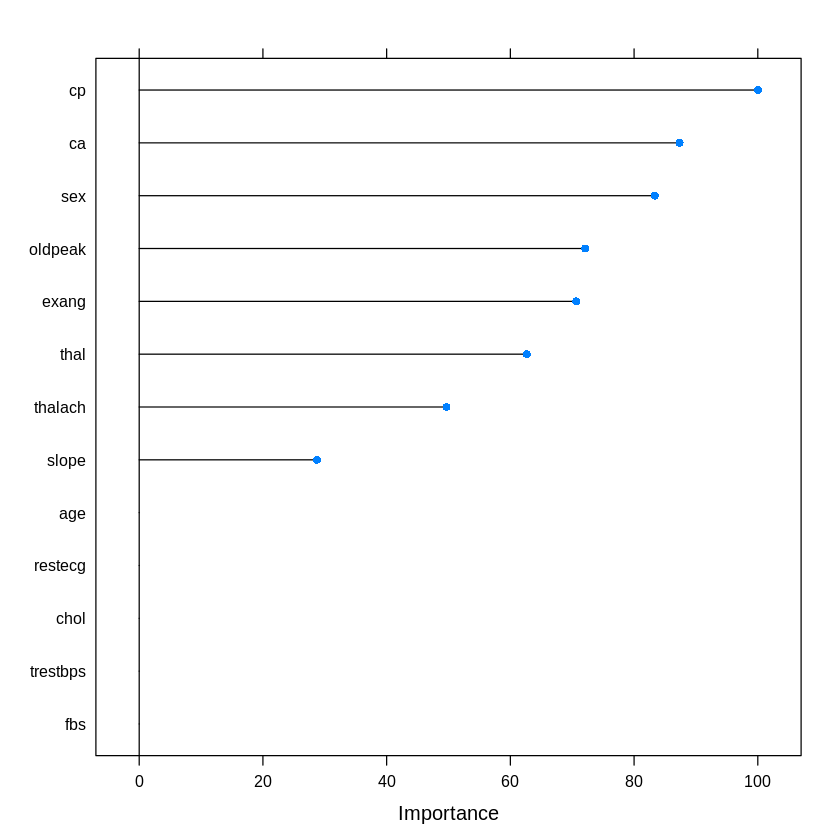

In [18]:
## Run LASSO
lambda <- 10^seq(-3,3,length=100)

lassoFit <- train(target ~ ., 
                  data = train, 
                  method = "glmnet", 
                  trControl = ctrl, 
                  family = "binomial",
                  preProcess = c("center","scale"),
                  tuneGrid = expand.grid(alpha = 1, lambda = lambda))

lassoFit # to obtain summary of the model
varImp(lassoFit) # to see most important parameters
plot(varImp(lassoFit)) # to plot most important parameters

## Exercise 3.4
Now all we have to do is to check the performance of our best performing model on the test dataset. 
Please use the  code below to check this performance.
Which model is best?
Why should you never test all your models straight away on the test dataset, but instead use your training data set first?

In [19]:
## Check performance on test set
# For LM:
print("LM performance")
pred_lm <- predict(lm, newdata = test)
confusionMatrix(pred_lm, test$target)

# For KNN
print("KNN performance")
pred_knn <- predict(knnFit, newdata = test)
confusionMatrix(pred_knn, test$target)

# For LASSO
print("LASSO performance")
pred_lasso <- predict(lassoFit, newdata = test)
confusionMatrix(pred_lasso, test$target)


[1] "LM performance"


Confusion Matrix and Statistics

          Reference
Prediction  1  2
         1 31  9
         2  8 43
                                          
               Accuracy : 0.8132          
                 95% CI : (0.7178, 0.8872)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 0.0000009353    
                                          
                  Kappa : 0.6198          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7949          
            Specificity : 0.8269          
         Pos Pred Value : 0.7750          
         Neg Pred Value : 0.8431          
             Prevalence : 0.4286          
         Detection Rate : 0.3407          
   Detection Prevalence : 0.4396          
      Balanced Accuracy : 0.8109          
                                          
       'Positive' Class : 1               
                                    

[1] "KNN performance"


Confusion Matrix and Statistics

          Reference
Prediction  1  2
         1 30  8
         2  9 44
                                          
               Accuracy : 0.8132          
                 95% CI : (0.7178, 0.8872)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 0.0000009353    
                                          
                  Kappa : 0.6174          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7692          
            Specificity : 0.8462          
         Pos Pred Value : 0.7895          
         Neg Pred Value : 0.8302          
             Prevalence : 0.4286          
         Detection Rate : 0.3297          
   Detection Prevalence : 0.4176          
      Balanced Accuracy : 0.8077          
                                          
       'Positive' Class : 1               
                                    

[1] "LASSO performance"


Confusion Matrix and Statistics

          Reference
Prediction  1  2
         1 30  9
         2  9 43
                                          
               Accuracy : 0.8022          
                 95% CI : (0.7055, 0.8784)
    No Information Rate : 0.5714          
    P-Value [Acc > NIR] : 0.000002972     
                                          
                  Kappa : 0.5962          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7692          
            Specificity : 0.8269          
         Pos Pred Value : 0.7692          
         Neg Pred Value : 0.8269          
             Prevalence : 0.4286          
         Detection Rate : 0.3297          
   Detection Prevalence : 0.4286          
      Balanced Accuracy : 0.7981          
                                          
       'Positive' Class : 1               
                                    